In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(train_img,train_labels),(test_img,test_labels)=cifar10.load_data()

In [3]:
classes=('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck')

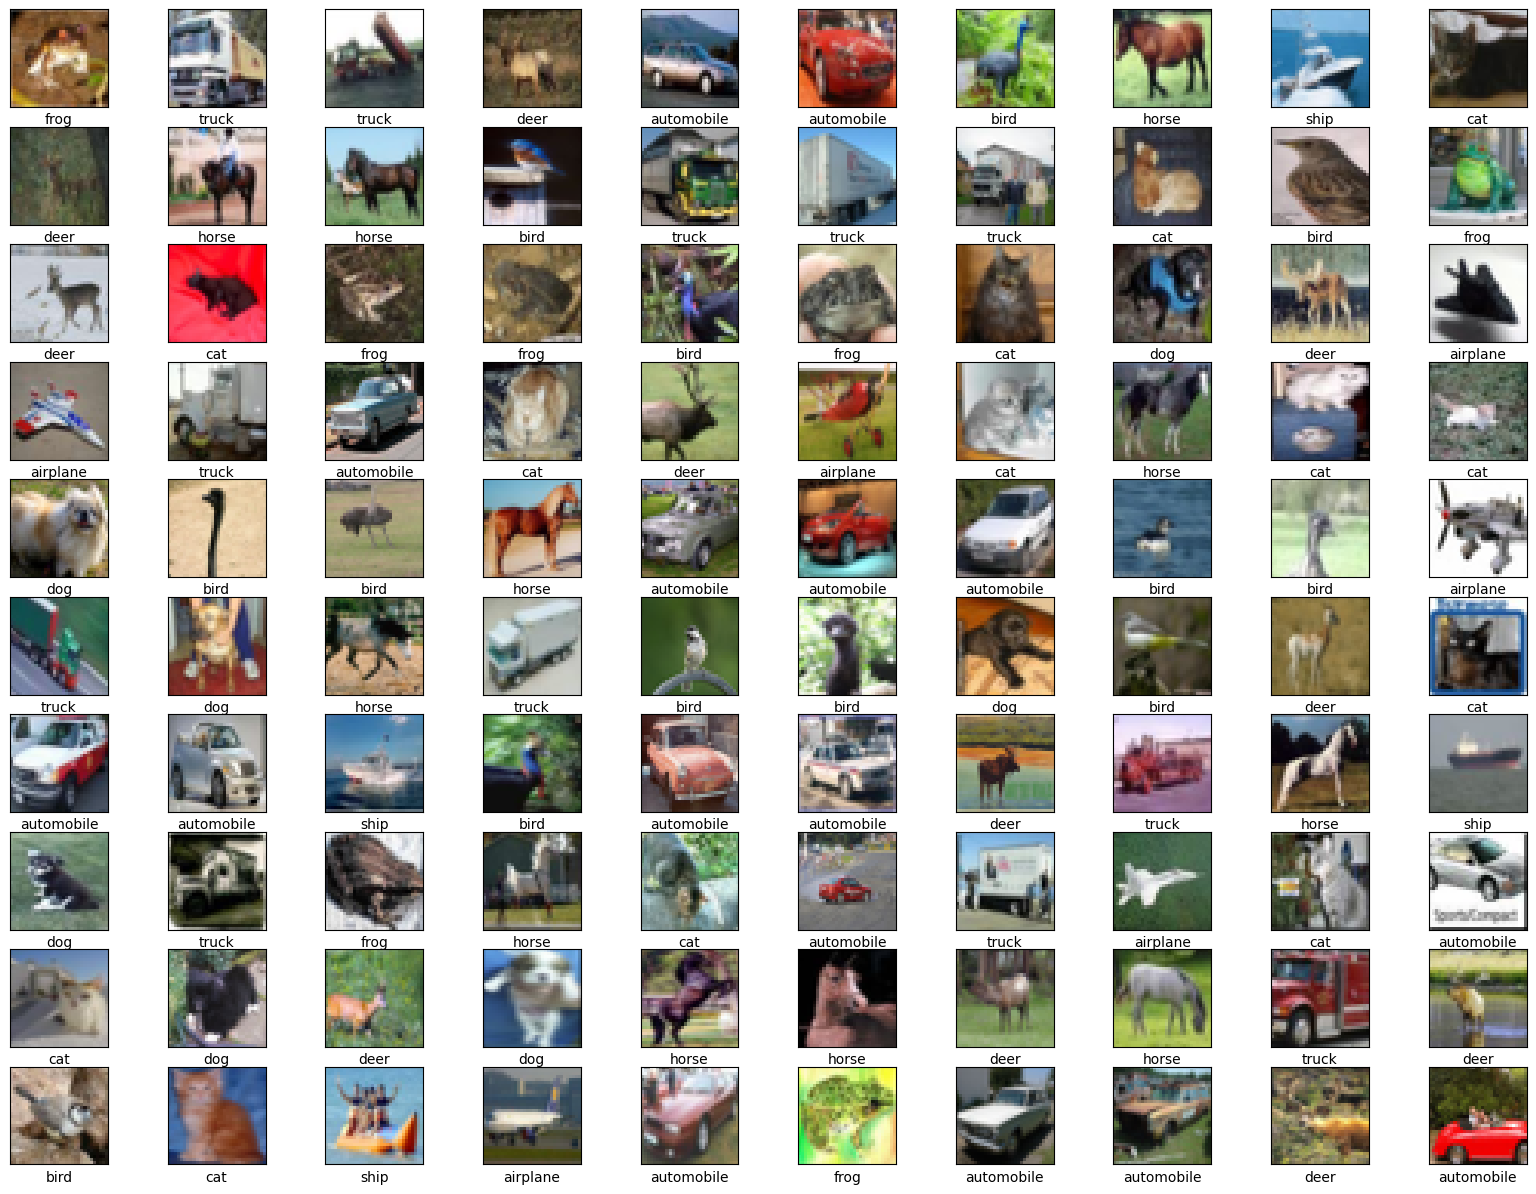

In [4]:
plt.figure(figsize=(20,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_img[i])
    plt.xlabel(classes[train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
train_img.shape

(50000, 32, 32, 3)

In [6]:
train_labels.shape

(50000, 1)

In [7]:
test_img.shape

(10000, 32, 32, 3)

In [8]:
test_labels.shape

(10000, 1)

In [9]:
train_img,test_img=train_img/255.0,test_img/255.0 #Floating point

# First Model

In [10]:
#First Model
model=Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [11]:
model.compile(optimizer='RMSprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.fit(x=train_img, y=train_labels,epochs=10, validation_split=0.3,batch_size=32)

Epoch 1/10
1094/1094 [==============================] - 14s 9ms/step - loss: 1.8424 - accuracy: 0.3339 - val_loss: 1.3968 - val_accuracy: 0.4883
Epoch 2/10
1094/1094 [==============================] - 9s 9ms/step - loss: 1.2146 - accuracy: 0.5723 - val_loss: 1.1465 - val_accuracy: 0.5917
Epoch 3/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.9707 - accuracy: 0.6610 - val_loss: 0.9588 - val_accuracy: 0.6859
Epoch 4/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.8434 - accuracy: 0.7134 - val_loss: 1.0876 - val_accuracy: 0.6229
Epoch 5/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.7790 - accuracy: 0.7391 - val_loss: 0.8577 - val_accuracy: 0.7205
Epoch 6/10
1094/1094 [==============================] - 9s 8ms/step - loss: 0.7349 - accuracy: 0.7555 - val_loss: 0.8534 - val_accuracy: 0.7155
Epoch 7/10
1094/1094 [==============================] - 9s 9ms/step - loss: 0.7158 - accuracy: 0.7653 - val_loss: 0.9039 - val_accuracy

# Second Model

In [13]:
#Second Model

model2 =  Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
  
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [14]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model2.fit(x=train_img, y=train_labels,epochs=10, validation_split=0.3,batch_size=42)

Epoch 1/10
834/834 [==============================] - 5s 6ms/step - loss: 1.5613 - accuracy: 0.4261 - val_loss: 1.2465 - val_accuracy: 0.5572
Epoch 2/10
834/834 [==============================] - 4s 4ms/step - loss: 1.1076 - accuracy: 0.6042 - val_loss: 1.0328 - val_accuracy: 0.6345
Epoch 3/10
834/834 [==============================] - 4s 4ms/step - loss: 0.8958 - accuracy: 0.6839 - val_loss: 0.8802 - val_accuracy: 0.6891
Epoch 4/10
834/834 [==============================] - 4s 4ms/step - loss: 0.7500 - accuracy: 0.7366 - val_loss: 0.8206 - val_accuracy: 0.7160
Epoch 5/10
834/834 [==============================] - 4s 4ms/step - loss: 0.6290 - accuracy: 0.7781 - val_loss: 0.7850 - val_accuracy: 0.7376
Epoch 6/10
834/834 [==============================] - 4s 4ms/step - loss: 0.5244 - accuracy: 0.8158 - val_loss: 0.7992 - val_accuracy: 0.7357
Epoch 7/10
834/834 [==============================] - 4s 4ms/step - loss: 0.4285 - accuracy: 0.8495 - val_loss: 0.8029 - val_accuracy: 0.7403
Epoch 

# Third Model

In [16]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [30]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10,activation='softmax')
])

# Compile the model using SGD optimizer and categorical crossentropy loss
opt = SGD(learning_rate=0.001, momentum=0.9)

In [31]:
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model3.fit(x=train_img, y=train_labels,epochs=15, validation_split=0.3,batch_size=42)

Epoch 1/15
834/834 [==============================] - 3s 4ms/step - loss: 2.1194 - accuracy: 0.2265 - val_loss: 1.9287 - val_accuracy: 0.3177
Epoch 2/15
834/834 [==============================] - 3s 3ms/step - loss: 1.8235 - accuracy: 0.3495 - val_loss: 1.7009 - val_accuracy: 0.3938
Epoch 3/15
834/834 [==============================] - 3s 3ms/step - loss: 1.6018 - accuracy: 0.4279 - val_loss: 1.5637 - val_accuracy: 0.4404
Epoch 4/15
834/834 [==============================] - 3s 3ms/step - loss: 1.4636 - accuracy: 0.4753 - val_loss: 1.4403 - val_accuracy: 0.4793
Epoch 5/15
834/834 [==============================] - 3s 3ms/step - loss: 1.3728 - accuracy: 0.5121 - val_loss: 1.3669 - val_accuracy: 0.5137
Epoch 6/15
834/834 [==============================] - 3s 3ms/step - loss: 1.3015 - accuracy: 0.5381 - val_loss: 1.3576 - val_accuracy: 0.5176
Epoch 7/15
834/834 [==============================] - 3s 3ms/step - loss: 1.2324 - accuracy: 0.5645 - val_loss: 1.3102 - val_accuracy: 0.5398
Epoch 